In [ ]:
# default_exp core

In [ ]:
#hide 
%load_ext autoreload
%autoreload 2

In [ ]:
#export
from rtma.imports import *

# Core

In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
#export
def load_audio(filename: str) -> (np.array, int):
    """
    Load audio as mono.
    return: signal, sample_rate (Hz)
    """
    # TODO: handle mono/stereo
    # TODO: resample?
    sample_rate, x = wavfile.read(filename)
    if x.dtype != np.float32:  
        # assuming int
        x = np.float32(x) / np.iinfo(x.dtype).max
    return x, sample_rate
    

In [ ]:
fn = "data/E_octaves_both.wav"
x, sr = load_audio(fn)

assert x.shape == (271522,)
assert x.dtype == np.float32
assert sr == 48000

In [ ]:
#export
def play_audio(x, sr):
    display(Audio(x, rate=sr, normalize=False))

In [ ]:
play_audio(x, sr)

In [ ]:
#export
def plot_audio(x: np.array, sr: int = 44100, figsize=(14,2)):
    """
    Plot a signal in the time domain.
    """
    t = np.arange(len(x)) / sr
    plt.figure(figsize=figsize)
    plt.xlabel('time (s)')
    plt.ylabel('amplitude')
    plt.ylim([-1, 1])
    plt.plot(t, x)
    plt.show()

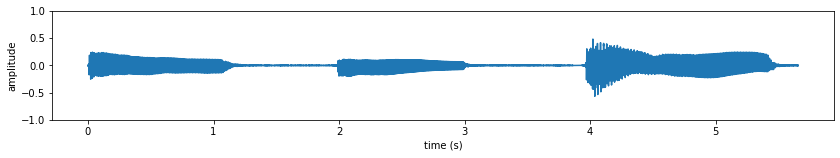

In [ ]:
plot_audio(x, sr)

In [ ]:
# #export
# def calc_spectrums(x: np.array, n_fft: int, hop_length: int, win_length: int) -> (np.array, np.array):
#     """
#     Calculate the magnitude and phase spectrum of a signal over time.
#     """
#     X = librosa.stft(x, n_fft=n_fft, win_length=win_length, hop_length=hop_length, pad_mode='constant')
#     return np.abs(X), np.angle(X)

In [ ]:
# mx, px = calc_spectrums(x, n_fft=2048, hop_length=511, win_length=1024)
# mx.shape, mx.dtype, px.shape, px.dtype
# assert mx.shape[0] == 1025
# assert px.shape[0] == 1025
# assert mx.dtype == np.float32
# assert px.dtype == np.float32

In [ ]:
# #export
# def plot_mag_spectrum(spectrum, sr, hop_length, min_bin=None, max_bin=None, figsize=(14,6)):
#     import librosa.display
#     fig, ax = plt.subplots(1, figsize=figsize)
#     coords = np.linspace(0, sr, spectrum.shape[0])[min_bin:max_bin]
#     spectrum = spectrum[min_bin:max_bin,:]
#     librosa.display.specshow(
#         spectrum,
#         y_coords=coords,
#         y_axis='hz',
#         x_axis='time',
#         sr=sr,
#         hop_length=hop_length,
#         ax=ax,
#     )
#     plt.show()

In [ ]:
# plot_mag_spectrum(mx, sr, 101, max_bin=50)

In [ ]:
#export
def plot_mags(m_xs, max_bin=None):
    if max_bin:
        m_xs = m_xs[:,:max_bin+1]
    plt.figure(figsize=(10, 6))
    plt.imshow(m_xs.T, aspect='auto', interpolation='nearest', origin='lower')
    plt.xlabel('time (frames)')
    plt.ylabel('frequency (fftbins)')
    plt.show()